<a href="https://colab.research.google.com/github/gustavosilvestre97/sistema_recomenda-o_desafio/blob/main/Recomendacao_Razze_Dazzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df_products = pd.read_csv("/content/DNC_products_dataset.csv",index_col=0)
df_order_reviews = pd.read_csv("/content/DNC_order_reviews_dataset.csv", index_col=0)
df_orders = pd.read_csv("/content/DNC_orders_dataset.csv", index_col=0)
df_order_items = pd.read_csv("/content/DNC_order_items_dataset.csv", index_col=0)

In [3]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


In [4]:
df_products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [5]:
df_order_items.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [6]:
df_order_items.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


In [7]:
df_orders.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [8]:
df_order_reviews.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [9]:
df2 = pd.merge(df_orders,df_order_reviews,how= 'left',on = 'order_id')
df2.head()

,order_id,customer_id,order_status,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5.0


In [10]:
df1 = pd.merge(df_order_items,df2, how='left', on = 'order_id')
df1.head()

,order_id,order_item_id,product_id,price,customer_id,order_status,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,7b07bacd811c4117b742569b04ce3580,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,0c5b33dea94867d1ac402749e5438e8b,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,f4028d019cb58564807486a6aaf33817,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,940144190dcba6351888cafa43f3a3a5,5.0


In [11]:
df = pd.merge(df1,df_products,how='left',on = 'product_id')
df.head()

,order_id,order_item_id,product_id,price,customer_id,order_status,review_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5.0,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,7b07bacd811c4117b742569b04ce3580,4.0,pet_shop,56.0,239.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,0c5b33dea94867d1ac402749e5438e8b,5.0,moveis_decoracao,59.0,695.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,f4028d019cb58564807486a6aaf33817,4.0,perfumaria,42.0,480.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,940144190dcba6351888cafa43f3a3a5,5.0,ferramentas_jardim,59.0,409.0,3750.0,35.0,40.0,30.0


In [12]:
df2.shape

(99992, 5)

In [13]:
df2.isna().sum()

order_id          0
customer_id       0
order_status      0
review_id       768
review_score    768
dtype: int64

In [14]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
print(df_order_items.shape)
print(df_order_reviews.shape)
print(df_orders.shape)
print(df_products.shape)

(112650, 4)
(99224, 3)
(99441, 3)
(32951, 8)


In [16]:
print("DF ORDER ITENS")
print(df_order_items.dtypes)
print('-'*20)
print('DF ORDER REVIEWS')
print(df_order_reviews.dtypes)
print('-'*20)
print('DF ORDERS')
print(df_orders.dtypes)
print('-'*20)
print('DF PRODUCTS')
print(df_products.dtypes)

DF ORDER ITENS
order_id          object
order_item_id      int64
product_id        object
price            float64
dtype: object
--------------------
DF ORDER REVIEWS
review_id       object
order_id        object
review_score     int64
dtype: object
--------------------
DF ORDERS
order_id        object
customer_id     object
order_status    object
dtype: object
--------------------
DF PRODUCTS
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


In [17]:
df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
price                            0
customer_id                      0
order_status                     0
review_id                      942
review_score                   942
product_category_name         1612
product_name_lenght           1612
product_description_lenght    1612
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

In [18]:
df = df.drop(['product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_width_cm','product_height_cm'], axis=1)

In [19]:
df.isna().sum()

order_id                    0
order_item_id               0
product_id                  0
price                       0
customer_id                 0
order_status                0
review_id                 942
review_score              942
product_category_name    1612
dtype: int64

# Itens *principais*

In [20]:
itens_sum = pd.DataFrame(df.groupby(['product_id'])['review_score'].count())
top10 = itens_sum.sort_values('review_score', ascending = False).head(10) 
top10



,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,524
422879e10f46682990de24d770e7f83d,486
99a4788cb24856965c36a24e339b6058,482
389d119b48cf3043d311335e499d9c6b,391
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,340
53b36df67ebb7c41585e8d54d6772e08,320
154e7e31ebfa092203795c972e5804a6,292


#Principais categorias

In [21]:
categ_sum = pd.DataFrame(df.groupby(['product_category_name'])['review_score'].sum())
princ_categ = categ_sum.sort_values('review_score', ascending = False).head(10)
princ_categ

,review_score
product_category_name,
cama_mesa_banho,43386.0
beleza_saude,39957.0
esporte_lazer,35493.0
moveis_decoracao,32520.0
informatica_acessorios,30853.0
utilidades_domesticas,28154.0
relogios_presentes,23914.0
telefonia,17828.0
ferramentas_jardim,17501.0


#Melhores produtos por categoria

In [23]:
cmb = pd.DataFrame(df.groupby(['product_category_name','product_id'])['review_score'].sum())
cmb = cmb.sort_values('review_score',ascending=False)
cmb.head(50)

review_score
product_category_name       product_id                                    
moveis_decoracao            aca2eb7d00ea1a7b8ebd4e68314663af        2106.0
ferramentas_jardim          422879e10f46682990de24d770e7f83d        1918.0
cama_mesa_banho             99a4788cb24856965c36a24e339b6058        1879.0
ferramentas_jardim          389d119b48cf3043d311335e499d9c6b        1610.0
                            368c6c730842d78016ad823897a372db        1522.0
                            53759a2ecddad2bb87a079a1f1519f73        1443.0
informatica_acessorios      d1c427060a0f73f6b889a5c7c61f2ac4        1426.0
relogios_presentes          53b36df67ebb7c41585e8d54d6772e08        1341.0
beleza_saude                154e7e31ebfa092203795c972e5804a6        1260.0
informatica_acessorios      3dd2a17168ec895c781a9191c1e95ad7        1145.0
beleza_saude                2b4609f8948be18874494203496bc318        1095.0
                            7c1bd920dbdf22470b68bde975dd3ccf         911.0
relogios_presentes          a62e25e09e05e6faf31d90c6ec1aa3d1         868.0
beleza_saude                bb50f2e236e5eea0100680137654686c         828.0
relogios_presentes          e0d64dcfaa3b6db5c54ca298ae101d05         729.0
utilidades_domesticas       42a2c92a0979a949ca4ea89ec5c7b934         716.0
beleza_saude                6cdd53843498f92890544667809f1595         669.0
cama_mesa_banho             f1c7f353075ce59d8a6f3cf58f419c9c         665.0
beleza_saude                437c05a395e9e47f9762e677a7068ce7         643.0
informatica_acessorios      e53e557d5a159f5aa2c5e995dfdf244b         641.0
beleza_saude                19c91ef95d509ea33eda93495c4d3481         638.0
casa_conforto               35afc973633aaeb6b877ff57b2793310         638.0
ferramentas_jardim          c4baedd846ed09b85f78a781b522f126         626.0
beleza_saude                e0cf79767c5b016251fe139915c59a26         609.0
perfumaria                  2028bf1b01cafb2d2b1901fca4083222         604.0
relogios_presentes          a92930c327948861c015c919a0bcb4a8         601.0
consoles_games              0aabfb375647d9738ad0f7b4ea3653b1         597.0
moveis_decoracao            b532349fe46b38fbc7bb3914c1bdae07         593.0
cama_mesa_banho             06edb72f1e0c64b14c5b79353f7abea3         583.0
ferramentas_jardim          8c591ab0ca519558779df02023177f44         583.0
relogios_presentes          7a10781637204d8d10485c71a6108a2e         579.0
                            461f43be3bdf8844e65b62d9ac2c7a5a         570.0
fashion_bolsas_e_acessorios d017a2151d543a9885604dc62a3d9dcc         569.0
beleza_saude                3fbc0ef745950c7932d5f2a446189725         567.0
informatica_acessorios      656e0eca68dcecf6a31b8ececfabe3e8         560.0
cama_mesa_banho             ec2d43cc59763ec91694573b31f1c29a         529.0
ferramentas_jardim          b0961721fd839e9982420e807758a2a6         523.0
cool_stuff                  c6dd917a0be2a704582055949915ab32         509.0
                            601a360bd2a916ecef0e88de72a6531a         504.0
                            54d9ac713e253fa1fae9c8003b011c2a         496.0
ferramentas_jardim          52c80cedd4e90108bf4fa6a206ef6b03         494.0
relogios_presentes          6f3b5b605d91b7439c5e3f5a8dffeea7         475.0
ferramentas_jardim          0bcc3eeca39e1064258aa1e932269894         473.0
perfumaria                  595fac2a385ac33a80bd5114aec74eb8         467.0
alimentos                   89321f94e35fc6d7903d36f74e351d40         466.0
beleza_saude                4c2394abfbac7ff59ec7a420918562fa         456.0
relogios_presentes          d285360f29ac7fd97640bf0baef03de0         454.0
ferramentas_jardim          08574b074924071f4e201e151b152b4e         450.0
informatica_acessorios      36f60d45225e60c7da4558b070ce4b60         447.0
moveis_decoracao            78efe838c04bbc568be034082200ac20         442.0

#Verificando correlação

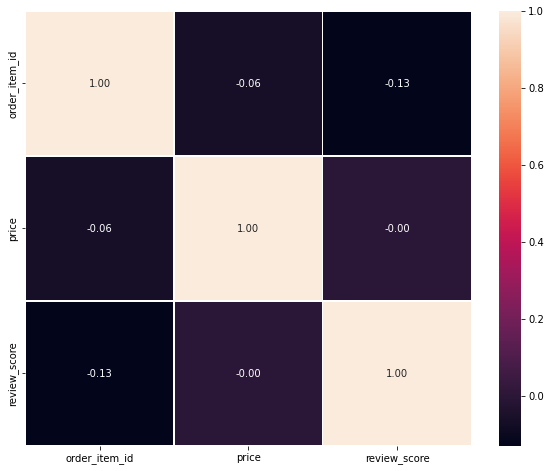

In [24]:
plt.figure(figsize=(10, 8))
plot = sn.heatmap(df.corr(), annot = True, fmt=".2f", linewidths=.5)
plot

#Verificando os clientes mais ativos

In [25]:
prod_id = df['product_id'].unique().tolist()
prod_id.sort()


user_count = df.groupby(by='customer_id', as_index=False) \
  .agg({'product_id': pd.Series.nunique}) \
  .rename(columns={'product_id': 'prod_count'})
shop_count = user_count.set_index('customer_id')
top1000_users = shop_count.sort_values('prod_count', ascending = False).head(1000)

top_user_ids = top1000_users.index.tolist()
top_user_ids.sort()

In [26]:
sample = df[df['customer_id'].isin(top_user_ids)]
sample.shape

(2860, 9)

In [27]:
def start_pipeline(dataf):
    return dataf.copy()

def get_user_counts(dataf):
  return dataf.groupby(by='customer_id', as_index=False) \
    .agg({'product_id': pd.Series.nunique}) \
    .rename(columns={'product_id': 'product_count'}) \
    .set_index('customer_id') \
    .sort_values('product_count', ascending = False)

def get_n_top_values(dataf, n):
  return dataf.head(n) \
    .index \
    .tolist()

top_user_ids = df \
  .pipe(start_pipeline) \
  .pipe(get_user_counts) \
  .pipe(get_n_top_values, n=1000)

top_user_ids[:10]

['0d861a5e4dd6a9079d89e1330848f0ab',
 'a67a246af6ba598a14cc86df3c0354ee',
 '1205480caca6c37f55954da838933b8a',
 '30bb84b541c96af98ba7d90b9ebf35d0',
 '50920f8cd0681fd86ebe93670c8fe52e',
 'c9dc6fff8500f3735822d5356bcb0e1b',
 'be1c4e52bb71e0c54b11a26b8e8d59f2',
 'c9b6ccc9f42e3ac60bb09a0f53a09973',
 'e898b5ef24833b9cb9e2d4f00b937595',
 '5e312b0d9bf5c91599eb42120e633b19']

In [36]:
def get_products_counts(dataf):
  return dataf.groupby(by='product_id', as_index=False) \
    .agg({'customer_id': pd.Series.nunique}) \
    .rename(columns={'customer_id': 'customer_id_count'}) \
    .set_index('product_id') \
    .sort_values('customer_id_count', ascending = False)

top_product_ids = df \
  .pipe(start_pipeline) \
  .pipe(get_products_counts) \
  .pipe(get_n_top_values, n=999)

top_product_ids[:10]

['99a4788cb24856965c36a24e339b6058',
 'aca2eb7d00ea1a7b8ebd4e68314663af',
 '422879e10f46682990de24d770e7f83d',
 'd1c427060a0f73f6b889a5c7c61f2ac4',
 '389d119b48cf3043d311335e499d9c6b',
 '53b36df67ebb7c41585e8d54d6772e08',
 '368c6c730842d78016ad823897a372db',
 '53759a2ecddad2bb87a079a1f1519f73',
 '154e7e31ebfa092203795c972e5804a6',
 '2b4609f8948be18874494203496bc318']

In [29]:
 def transform_sample(dataf):
    return pd.DataFrame({
      "cliente": sample['customer_id'],
      "produto": sample['product_id'],
      "acao": sample['review_score']
  })

matriz_de_relacionamento_user_sampled = df[df["customer_id"].isin(top_user_ids)] \
  .pipe(transform_sample) \
  .pivot_table(index="cliente", columns="produto", values="acao").fillna(0)

matriz_de_relacionamento_user_sampled.shape

(982, 2056)

In [30]:
matriz_de_relacionamento_product_sampled = df[df["product_id"].isin(top_product_ids)] \
  .pipe(transform_sample) \
  .pivot_table(index="produto", columns="cliente", values="acao").fillna(0)

matriz_de_relacionamento_product_sampled.shape

(2056, 982)

In [31]:
cos_user = cosine_similarity(matriz_de_relacionamento_user_sampled)

print(cos_user)
cos_user.shape

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(982, 982)

In [32]:
cos_item = cosine_similarity(matriz_de_relacionamento_product_sampled)

print(cos_item)
cos_item.shape

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(2056, 2056)

In [33]:
corr_users = np.corrcoef(matriz_de_relacionamento_user_sampled)

print(corr_users)
corr_users.shape

[[ 1.         -0.00146128 -0.00146128 ... -0.00146128 -0.00168775
  -0.00146128]
 [-0.00146128  1.         -0.00146128 ... -0.00146128 -0.00168775
  -0.00146128]
 [-0.00146128 -0.00146128  1.         ... -0.00146128 -0.00168775
  -0.00146128]
 ...
 [-0.00146128 -0.00146128 -0.00146128 ...  1.         -0.00168775
  -0.00146128]
 [-0.00168775 -0.00168775 -0.00168775 ... -0.00168775  1.
  -0.00168775]
 [-0.00146128 -0.00146128 -0.00146128 ... -0.00146128 -0.00168775
   1.        ]]


(982, 982)

In [34]:
corr_items = np.corrcoef(matriz_de_relacionamento_product_sampled)

print(corr_items)
corr_items.shape

[[ 1.         -0.00101937 -0.00101937 ... -0.00101937 -0.00101937
  -0.00101937]
 [-0.00101937  1.         -0.00101937 ... -0.00101937 -0.00101937
  -0.00101937]
 [-0.00101937 -0.00101937  1.         ...  1.         -0.00101937
  -0.00101937]
 ...
 [-0.00101937 -0.00101937  1.         ...  1.         -0.00101937
  -0.00101937]
 [-0.00101937 -0.00101937 -0.00101937 ... -0.00101937  1.
  -0.00101937]
 [-0.00101937 -0.00101937 -0.00101937 ... -0.00101937 -0.00101937
   1.        ]]


(2056, 2056)

In [35]:
prodint = matriz_de_relacionamento_product_sampled.index[-1]

print(f"Produto de interesse: {prodint}")

prdidx = matriz_de_relacionamento_product_sampled.index.tolist().index(prodint)
print(f"Produto de id: {prodint},tem índice {prdidx}")

closest_10_products = np.argsort(-corr_items[prdidx])[:10]

for i in zip(matriz_de_relacionamento_product_sampled.index[closest_10_products], corr_items[prdidx][closest_10_products]):
    print(f"Produto {i[0]} tem similaridade de {i[1]:.5f} com o produto {prodint}")

Produto de interesse: fff1059cd247279f3726b7696c66e44e
Produto de id: fff1059cd247279f3726b7696c66e44e,tem índice 2055
Produto fff1059cd247279f3726b7696c66e44e tem similaridade de 1.00000 com o produto fff1059cd247279f3726b7696c66e44e
Produto 2beea058d80efa4403a56673a219352d tem similaridade de 1.00000 com o produto fff1059cd247279f3726b7696c66e44e
Produto d0efdc4a1cc12f88f6a290fda8861fa7 tem similaridade de -0.00102 com o produto fff1059cd247279f3726b7696c66e44e
Produto e5f8f7fec18736ea009f2f7334543497 tem similaridade de -0.00102 com o produto fff1059cd247279f3726b7696c66e44e
Produto 84f47b7ffbd21c845d197cc0a7bc479a tem similaridade de -0.00102 com o produto fff1059cd247279f3726b7696c66e44e
Produto cfb133b7458336455fa60b97ac3aaba9 tem similaridade de -0.00102 com o produto fff1059cd247279f3726b7696c66e44e
Produto effa78286556d5e79cda2b4aba96a534 tem similaridade de -0.00102 com o produto fff1059cd247279f3726b7696c66e44e
Produto 0dce4d890959f0607b58e7475d13fc86 tem similaridade de -0.